In [3]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly pandas matplotlib tensorflow-datasets
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

  Using cached tf_nightly-2.21.0.dev20250728-cp313-cp313-manylinux_2_27_x86_64.whl.metadata (4.5 kB)
  Using cached tensorflow_datasets-4.9.9-py3-none-any.whl.metadata (11 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.31.1-cp39-abi3-manylinux2014_x86_64.whl.metadata (593 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp313-cp313-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached grpcio-1.74.0

2025-07-30 21:06:03.472094: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-30 21:06:03.472513: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-30 21:06:03.510642: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/nooneknows/projects/fCC/neural-network-sms-text-classifier/.venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than th

2.21.0-dev20250728


In [4]:
# get data files
import os


if not os.path.exists("train-data.tsv"):
    !curl -L -O https://cdn.freecodecamp.org/project-data/sms/train-data.tsv

if not os.path.exists("valid-data.tsv"):
    !curl -L -O https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

In [5]:
columns = ["type", "message"]
train_df = pd.read_csv(filepath_or_buffer=train_file_path, sep="\t", names=columns)

train_df.head()

,type,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [6]:
test_df = pd.read_csv(filepath_or_buffer=test_file_path, sep="\t", names=columns)

test_df.head()

,type,message
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?


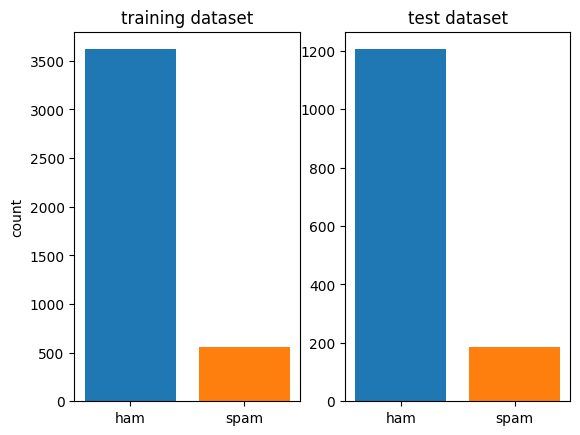

In [7]:
# visualize data
train_df_ham_count = train_df["type"].where(train_df["type"]=="ham").count()
train_df_spam_count = train_df["type"].where(train_df["type"]=="spam").count()

plt.subplot(1, 2, 1)
plt.bar(x="ham", height=train_df_ham_count).set_label("ham")
plt.bar(x="spam", height=train_df_spam_count).set_label("spam")
# plt.xlabel(xlabel="type")
plt.ylabel(ylabel="count")
plt.title("training dataset")

test_df_ham_count = test_df["type"].where(test_df["type"]=="ham").count()
test_df_spam_count = test_df["type"].where(test_df["type"]=="spam").count()

plt.subplot(1, 2, 2, )
plt.bar(x="ham", height=test_df_ham_count).set_label("ham")
plt.bar(x="spam", height=test_df_spam_count).set_label("spam")
plt.title("test dataset")

plt.show()

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):



  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()